## Decision Tree

In [26]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
# Encoding our Categorical data
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['BP'] = encoder.fit_transform(df['BP'])
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'])
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
16,69,1,1,1,11.455,drugX
141,64,0,1,1,25.741,drugY
113,65,0,1,1,13.769,drugX
65,68,0,2,1,27.050,drugY
4,61,0,1,0,18.043,drugY
109,23,1,2,0,16.850,drugY
42,50,1,2,1,15.790,drugY
48,23,1,2,0,31.686,drugY
83,38,0,0,1,11.326,drugA
162,43,1,2,1,12.859,drugX


In [8]:
#Splitting our DataFrame into X and y variables
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df['Drug'].values

In [11]:
# Train_Test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [12]:
# Model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_predict = tree_model.predict(X_test)

In [14]:
# Evaluating model
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



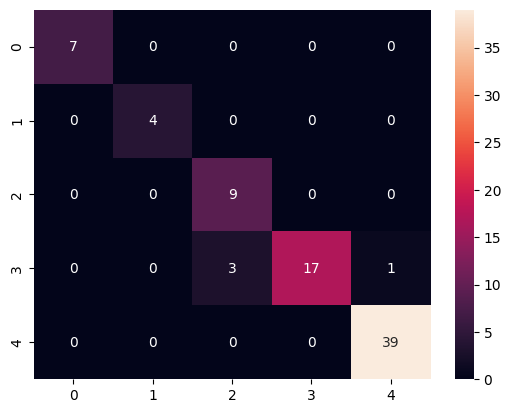

In [15]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [16]:
# Cross Validation
y_predict = cross_val_predict(tree_model, X, y, cv=10)
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

       drugA       0.96      1.00      0.98        23
       drugB       1.00      0.94      0.97        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.99       200
   macro avg       0.99      0.98      0.99       200
weighted avg       0.99      0.99      0.99       200



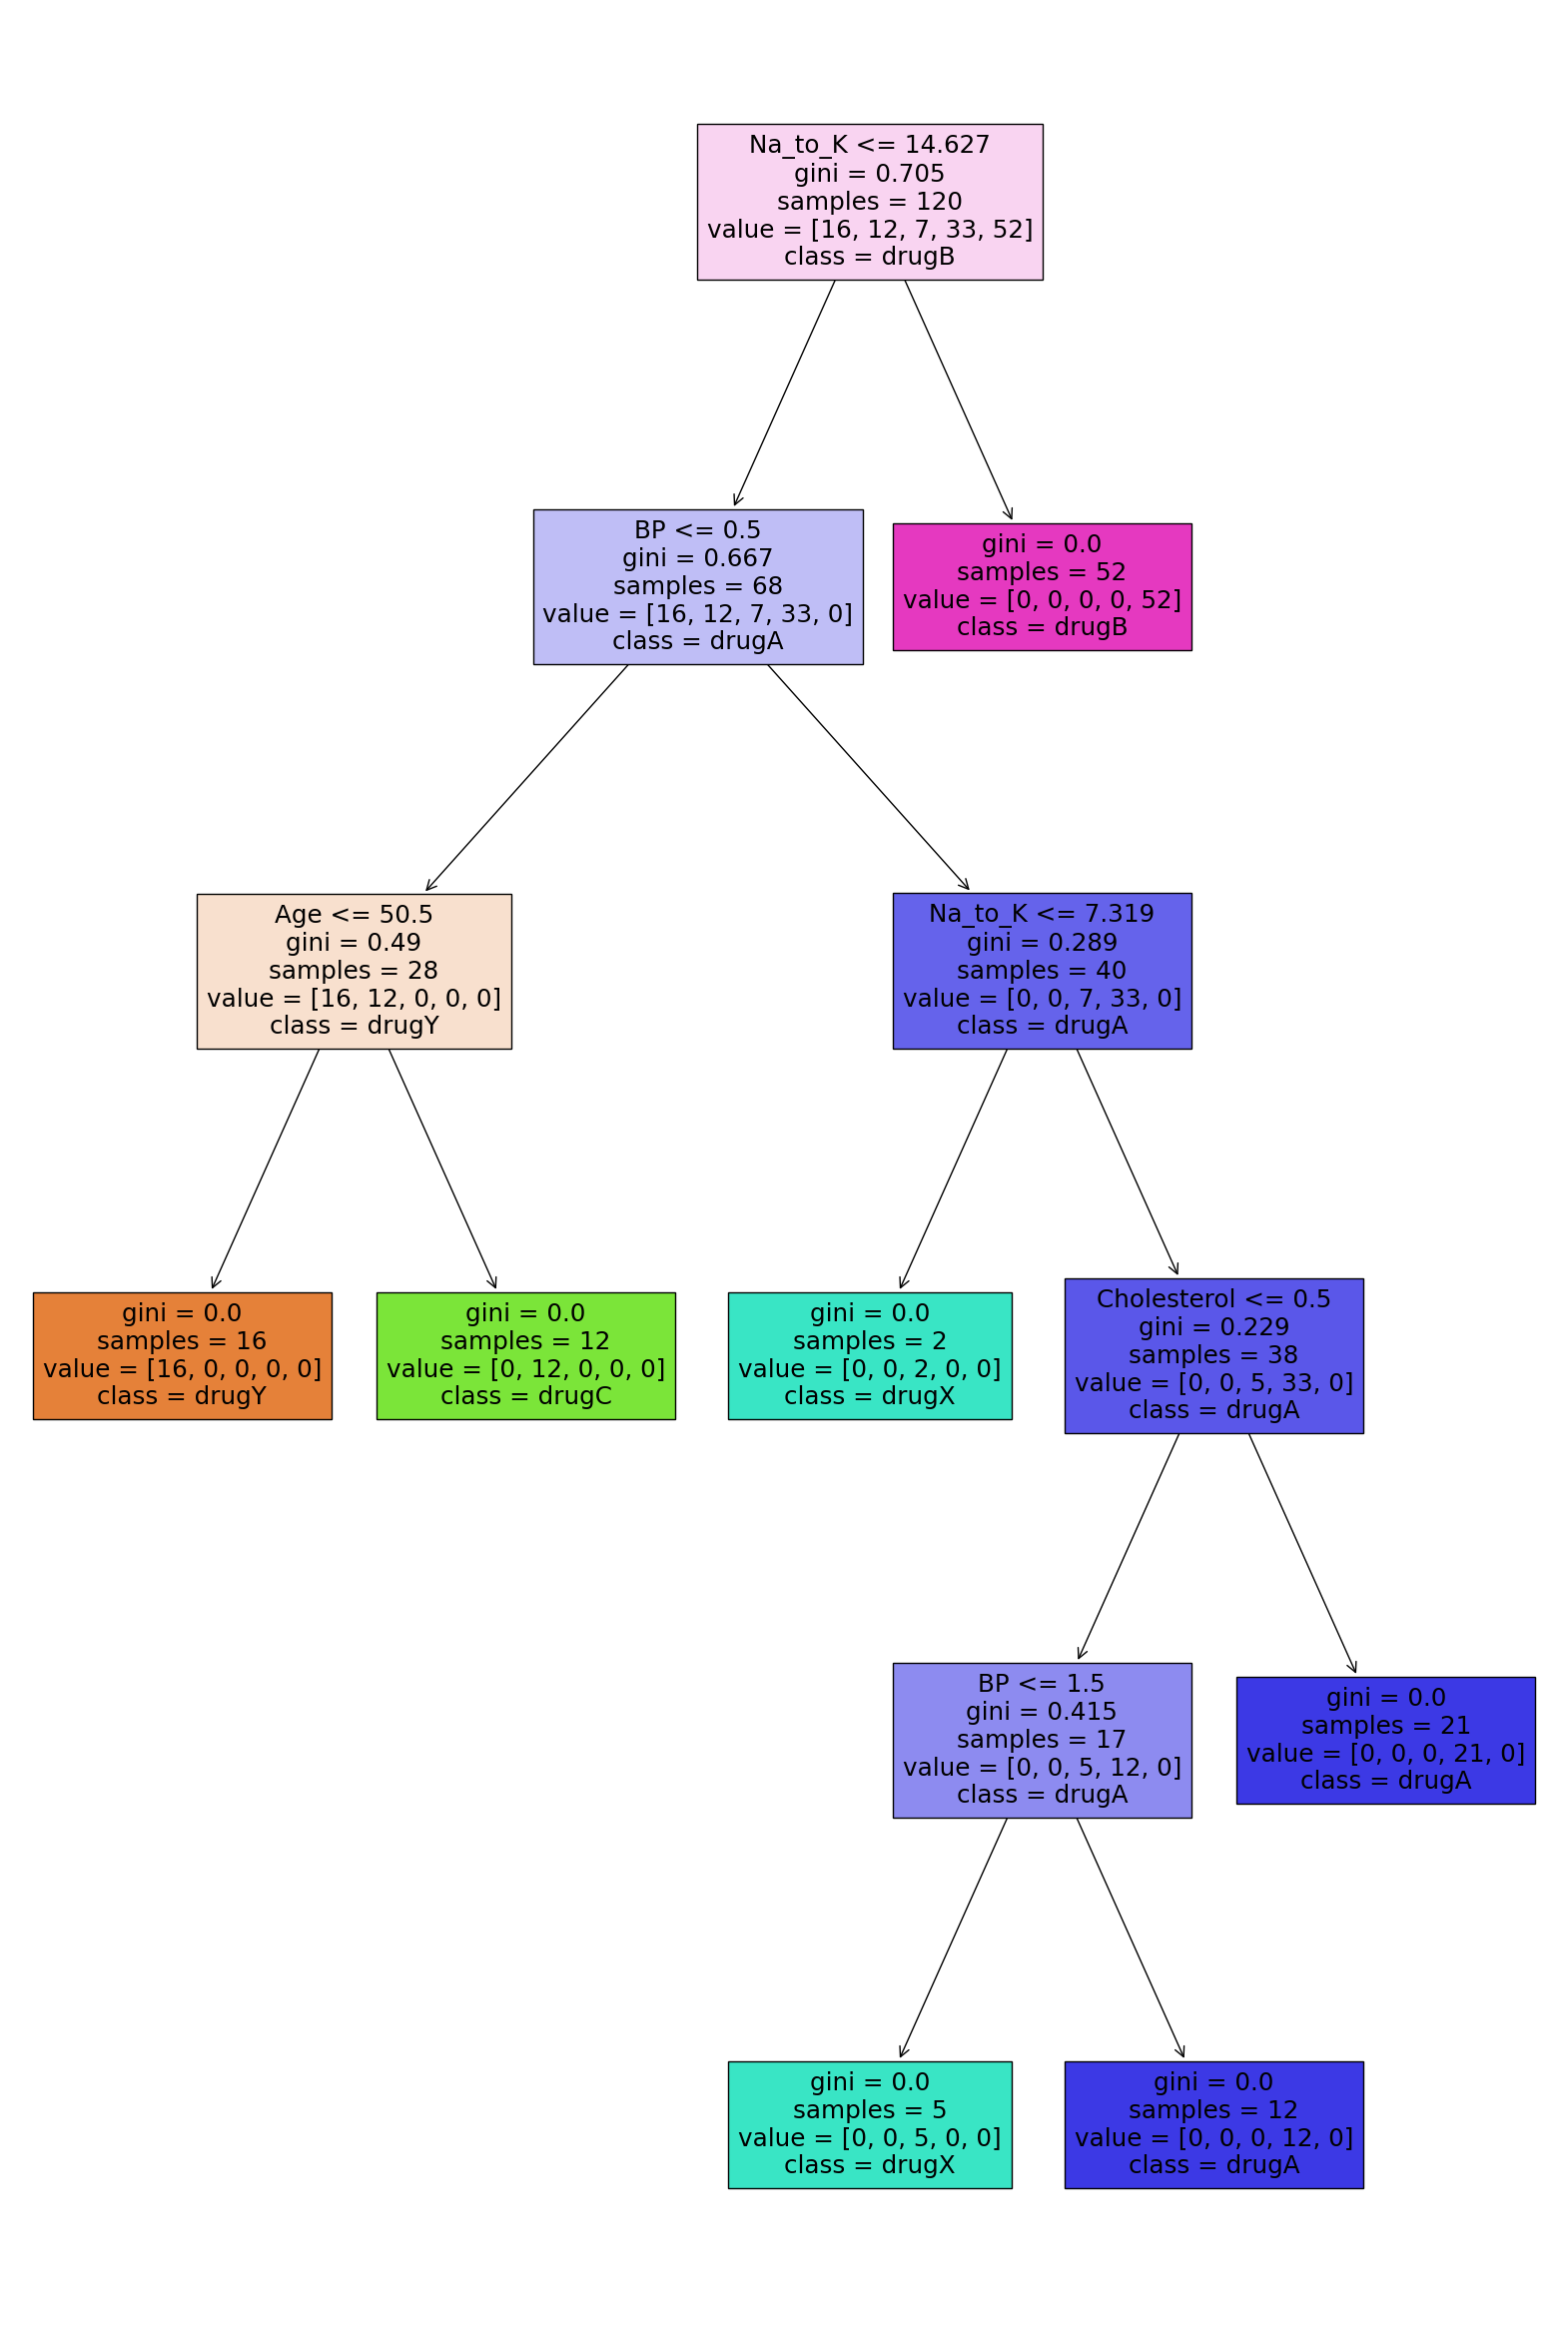

In [17]:
# Plotting Decision Tree
cols = df.drop('Drug', axis = 1).columns
classes = df['Drug'].unique()
plt.figure(figsize = (20,30))
tree.plot_tree(tree_model, feature_names = cols, class_names = classes, filled = True)
plt.show()

### Hyperparameters

Decision Tree accuracy 0.8375


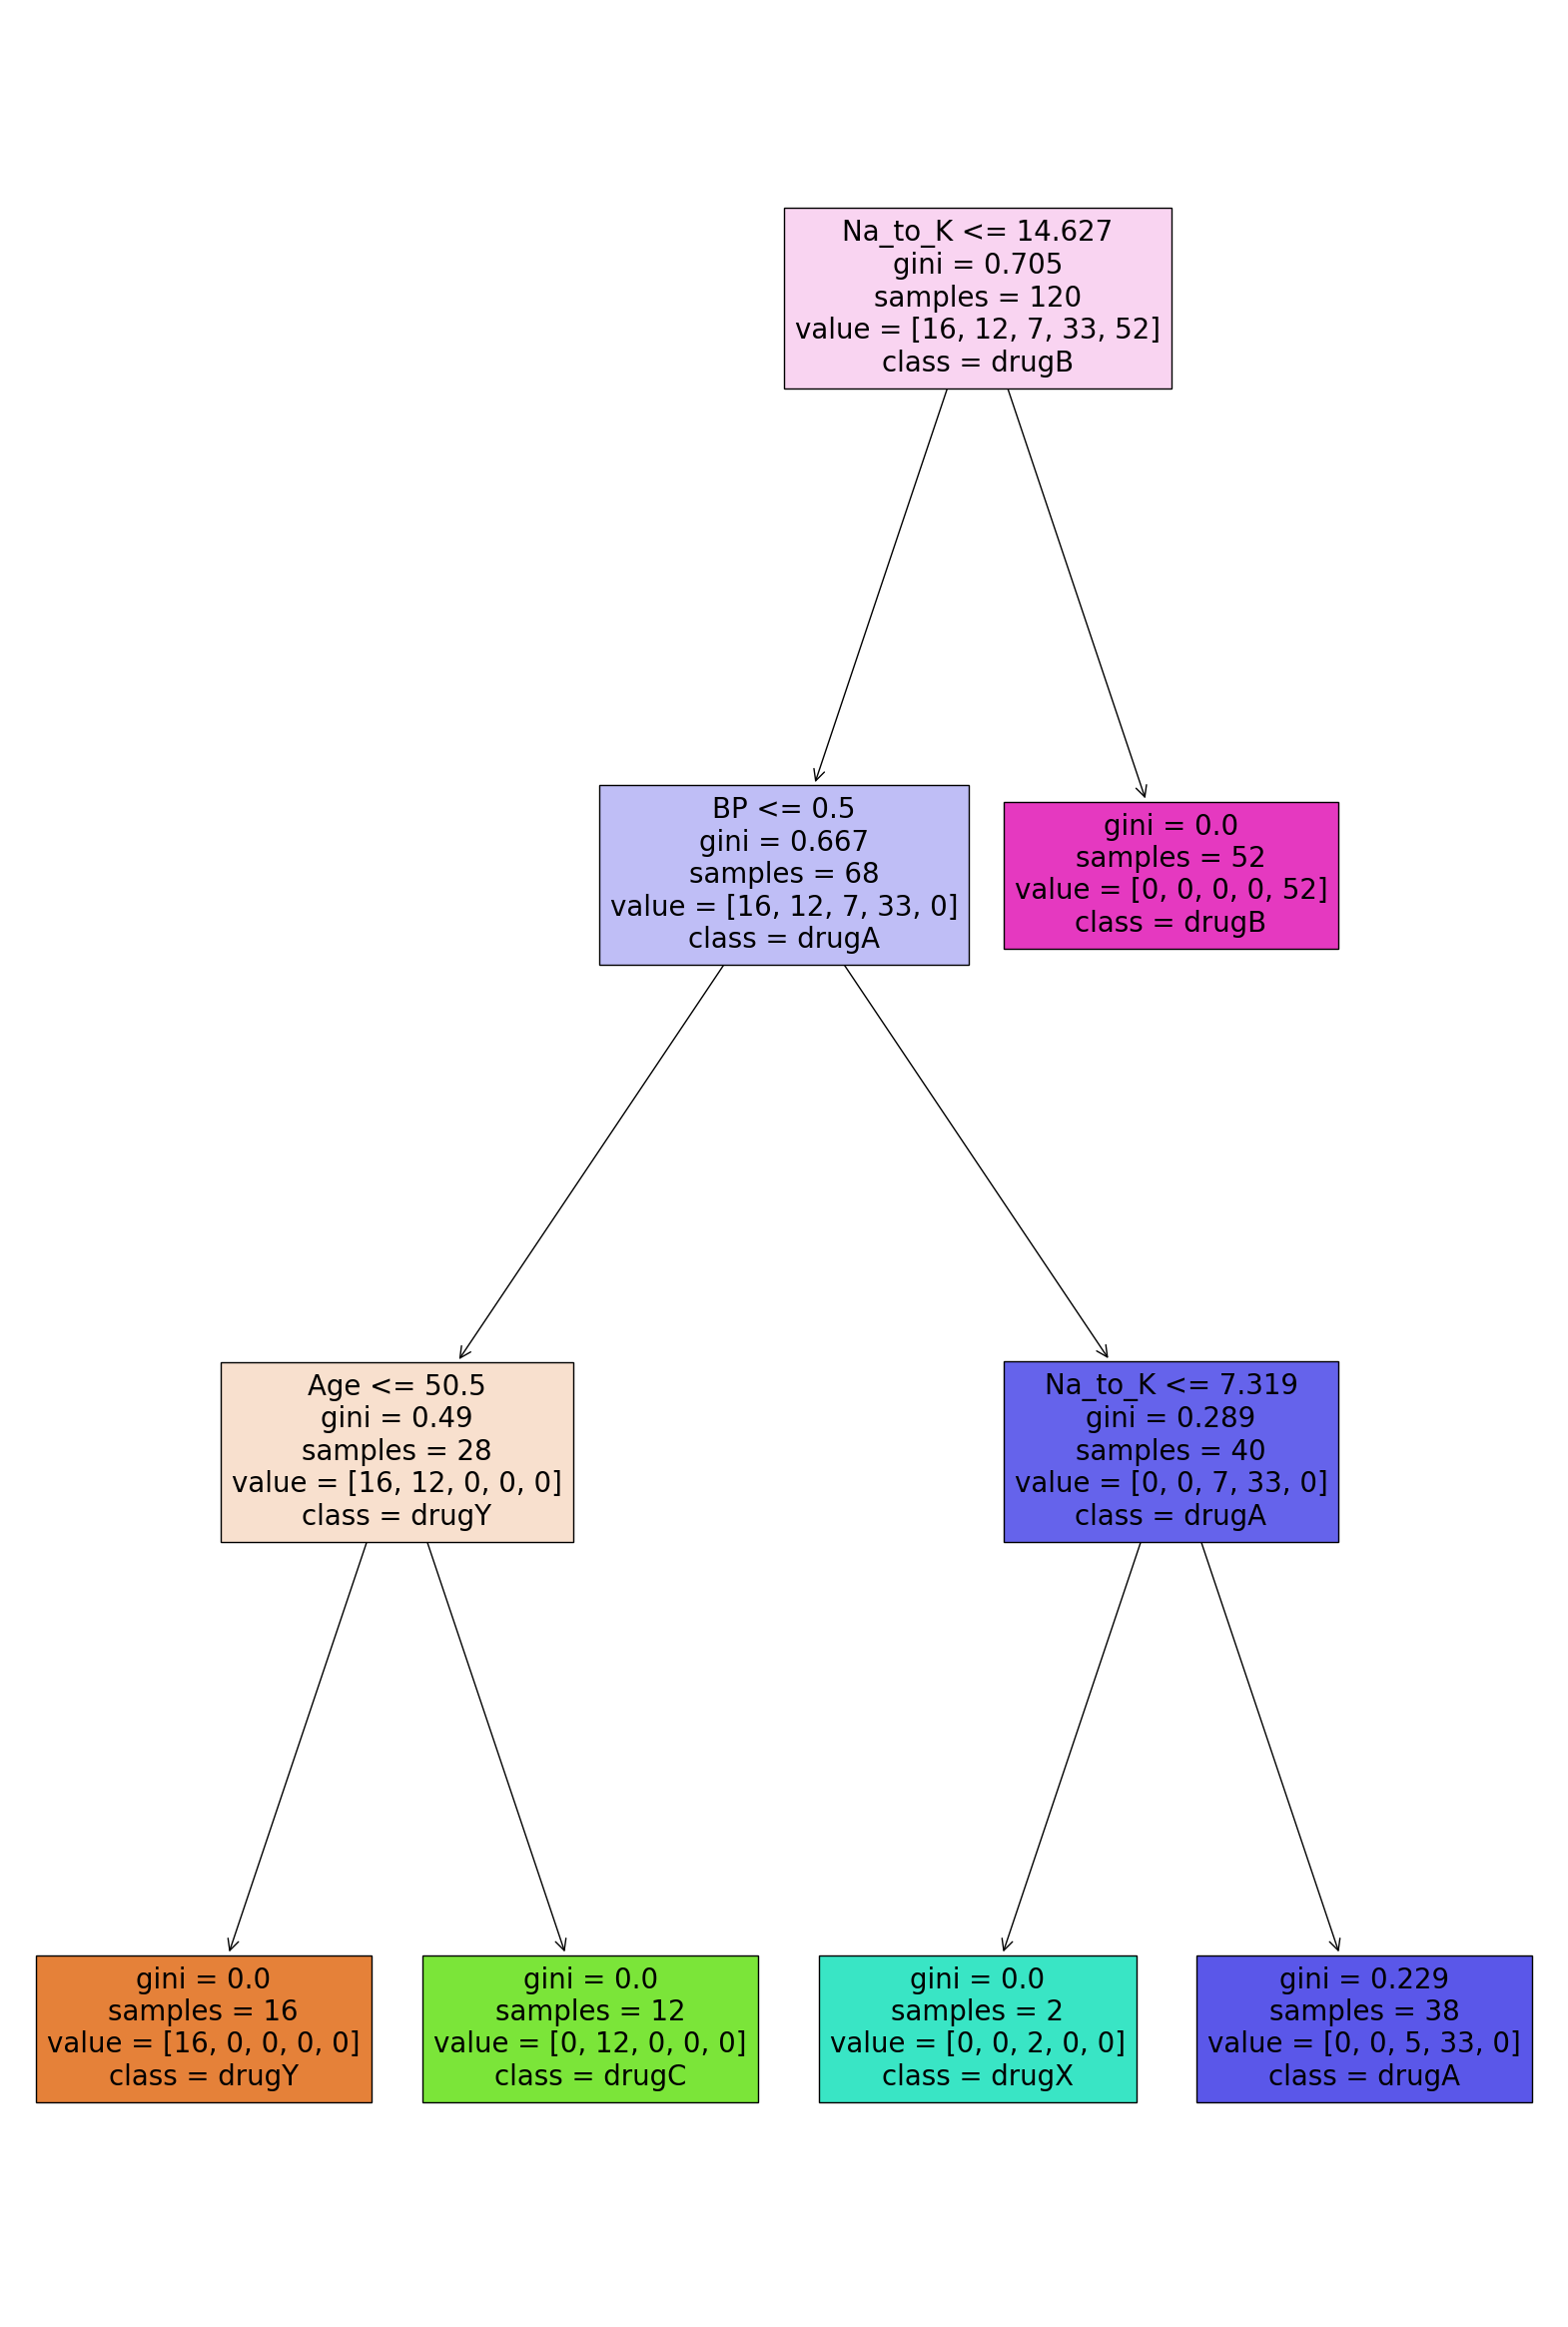

In [22]:
# mean_impurity_decrease
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.02)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print('Decision Tree accuracy', metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize = (20,30))
tree.plot_tree(tree_model, feature_names = cols, class_names = classes, filled = True )
plt.show()

Decision Tree accuracy 0.8375


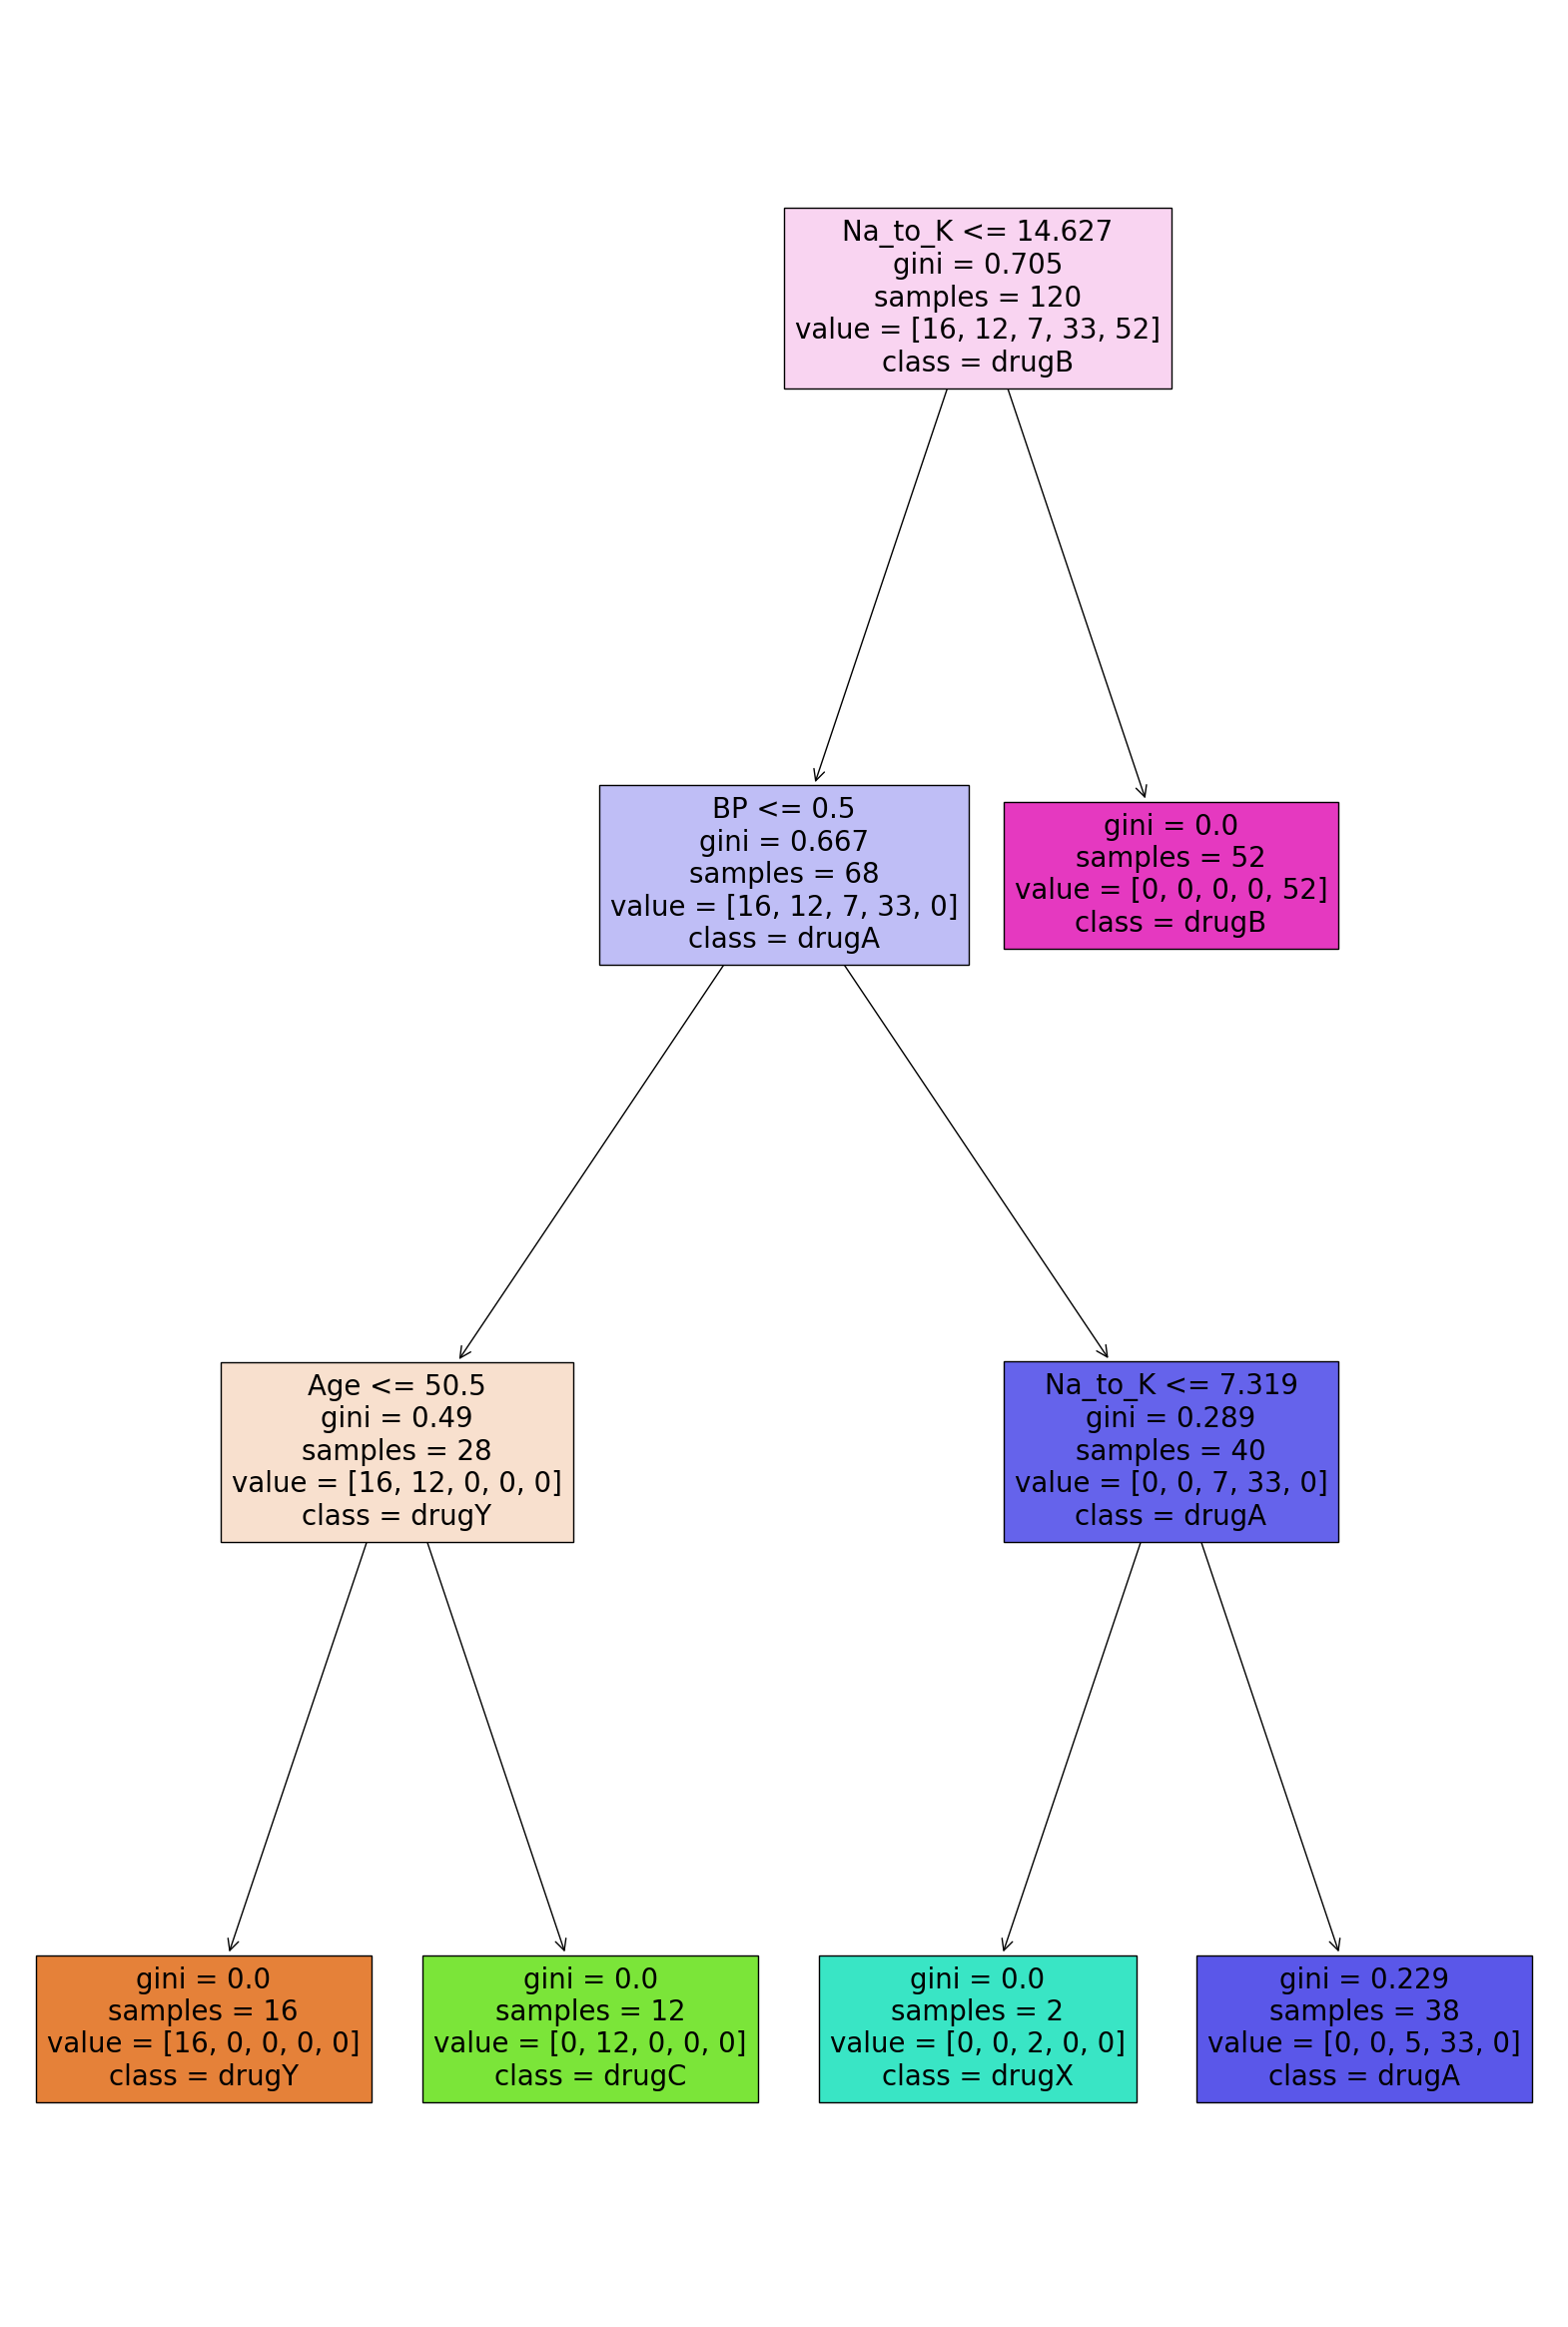

In [23]:
# max_depth
# mean_impurity_decrease
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.02, max_depth = 3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print('Decision Tree accuracy', metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize = (20,30))
tree.plot_tree(tree_model, feature_names = cols, class_names = classes, filled = True )
plt.show()

Decision Tree accuracy 0.875


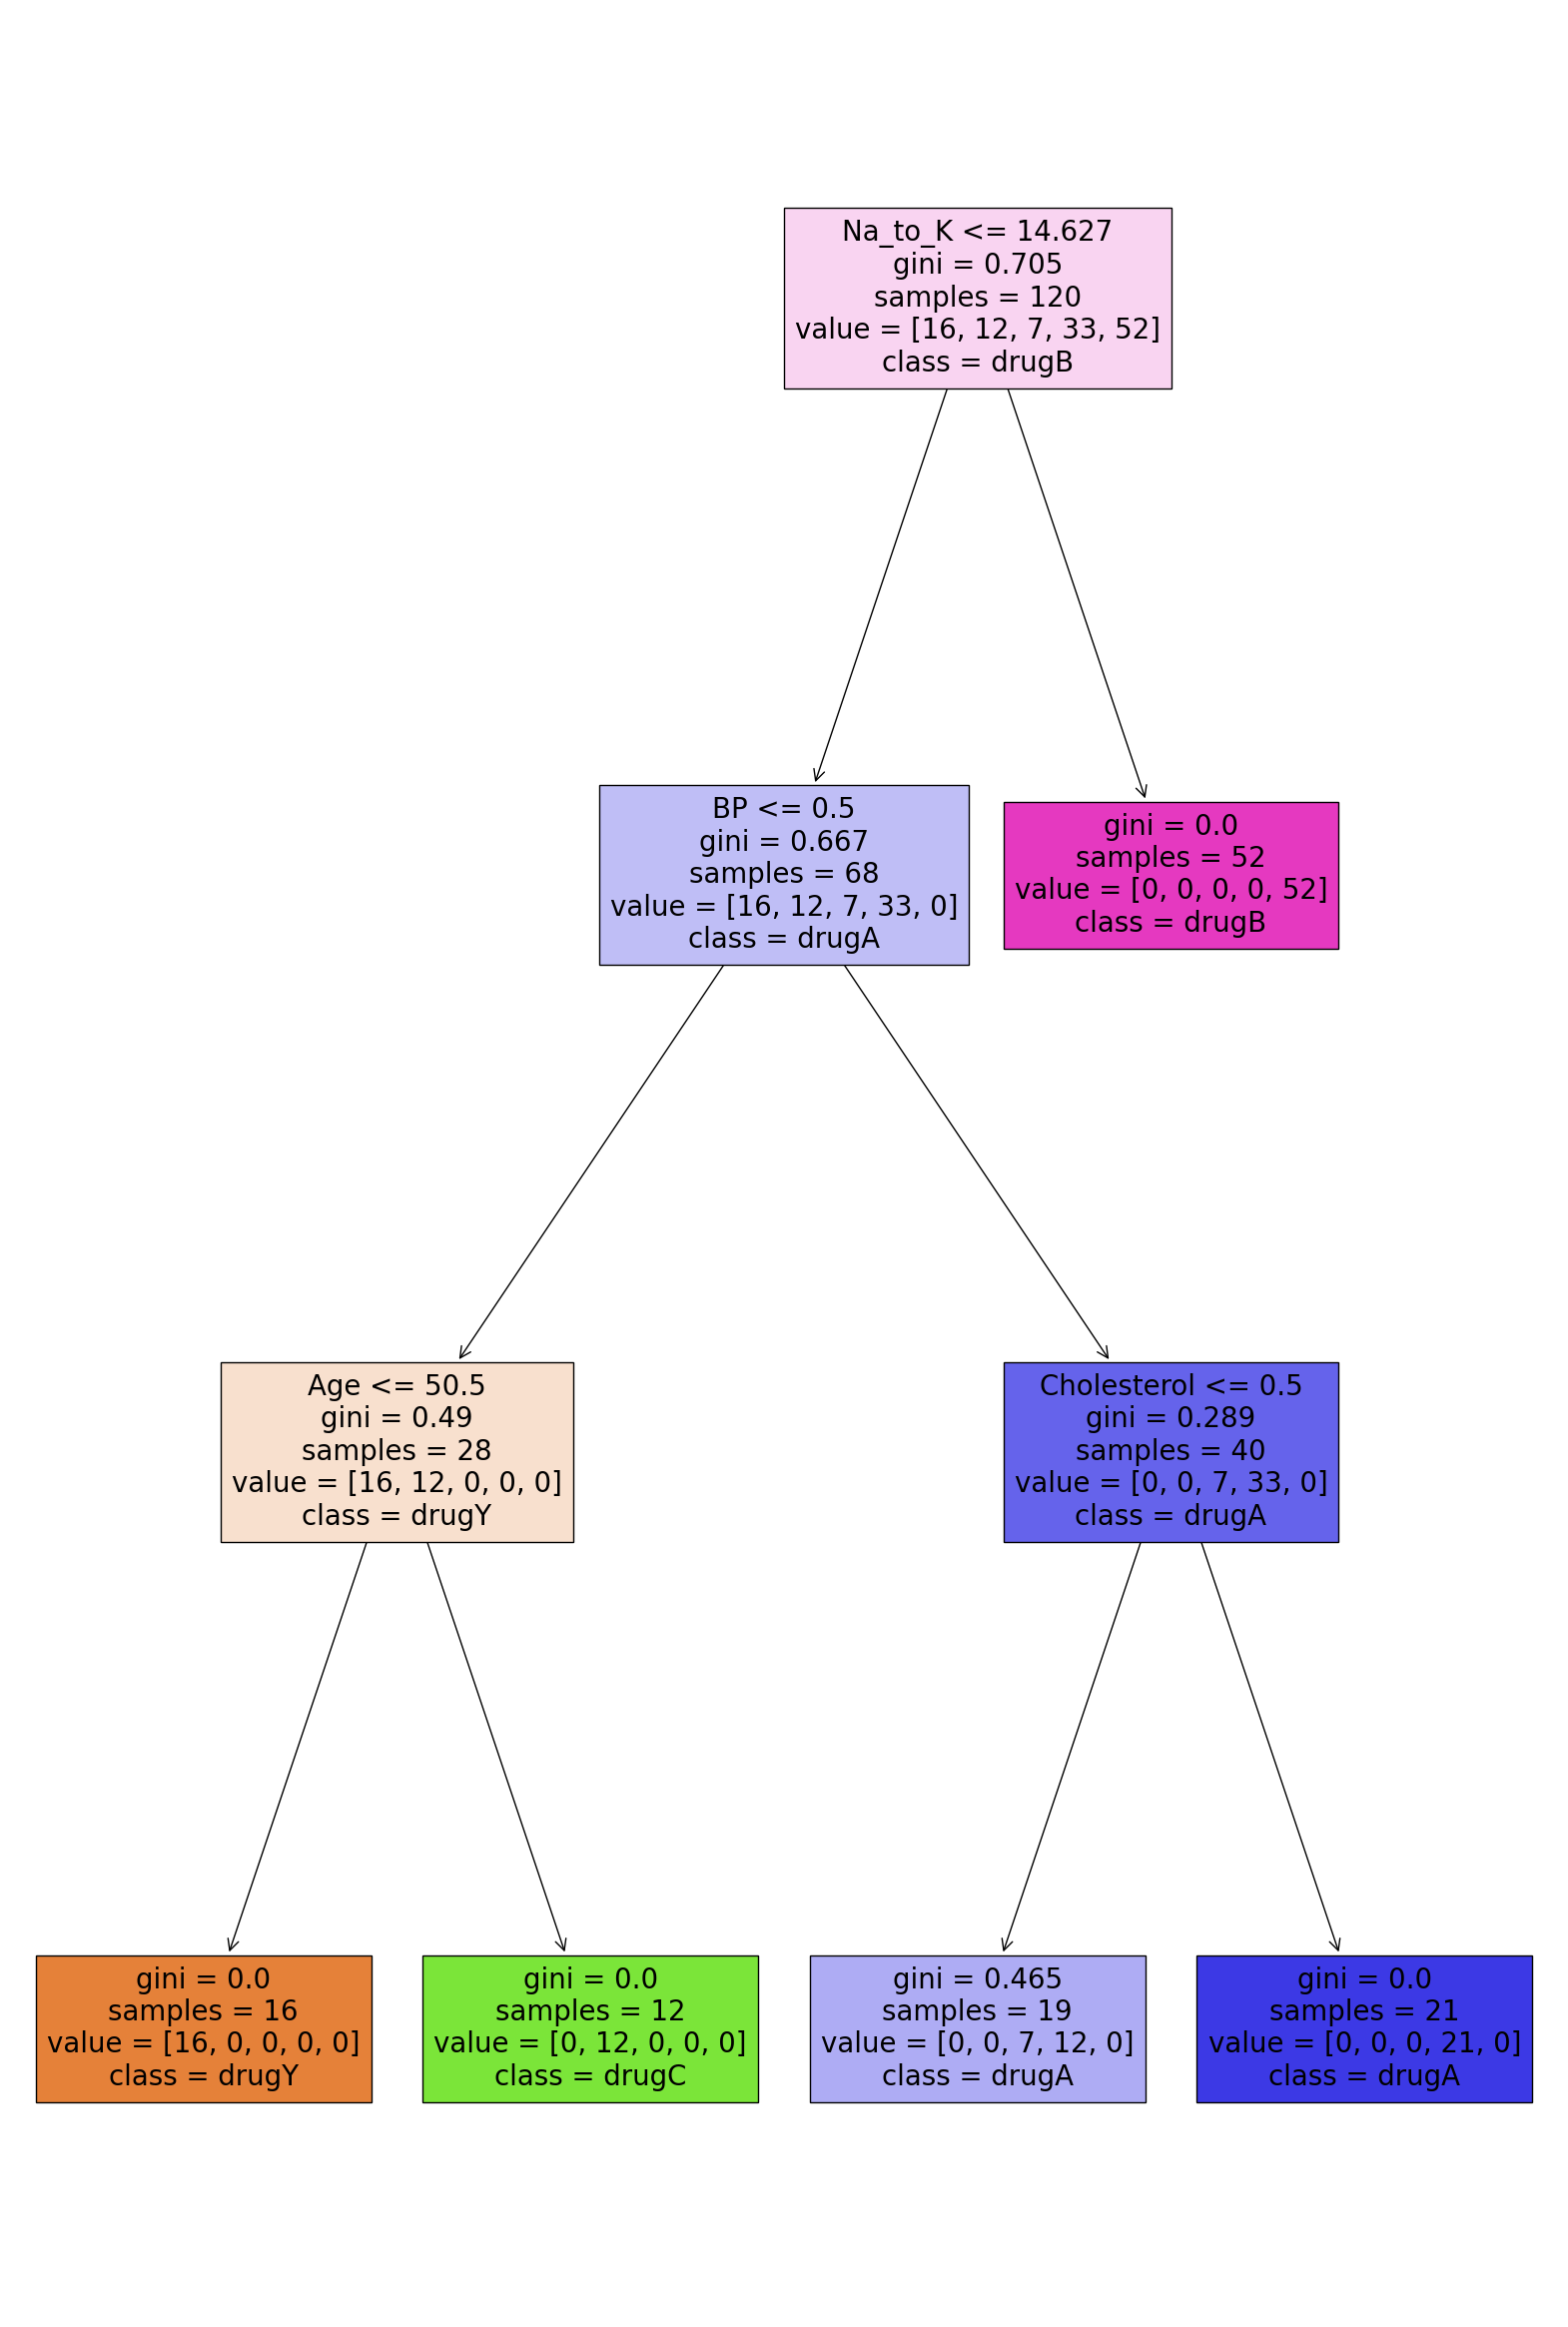

In [25]:
# mean_samples_leaf
# mean_impurity_decrease
tree_model = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print('Decision Tree accuracy', metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize = (20,30))
tree.plot_tree(tree_model, feature_names = cols, class_names = classes, filled = True )
plt.show()

### Random Forest

In [28]:
rf_model = RandomForestClassifier(n_estimators = 100) # number of Tress in Random Forest
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.95      0.98        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [29]:
print(metrics.accuracy_score(y_test, y_predict))

0.9875
